In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
haberman=pd.read_csv("haberman.csv")

In [2]:
print(haberman.shape)

(305, 4)


In [3]:
print(haberman.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [4]:
haberman.columns=('age','op_year','axil_nodes','surv_status')

In [5]:
print(haberman.columns)

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')


In [6]:
print(haberman)

     age  op_year  axil_nodes  surv_status
0     30       62           3            1
1     30       65           0            1
2     31       59           2            1
3     31       65           4            1
4     33       58          10            1
..   ...      ...         ...          ...
300   75       62           1            1
301   76       67           0            1
302   77       65           3            1
303   78       65           1            2
304   83       58           2            2

[305 rows x 4 columns]


Observations:
1. The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
2.the age column provides the age of the patient,op_year provides the year i which the surgery was done,axil_nodes provides the information about number of positve axillary nodes detected.
3. Surv_status has 2 values 1 & 2. if the surv_status is one then the person has lived 5 years or longer after the operation if surv_status is 2 then the person has died in less than 5 years after the operation.

In [11]:
#Objective:To find the rate of survival of patients having different positive auxilary nodes who had undergone the breast cancer surgery.
haberman.iloc[:, :3].describe()

,age,op_year,axil_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


As we can seee clearly from the above analysis that the 75% of axil_nodes are having value 4 and there is only one max value 52 which can be an outlier we can check by calculating mean and median.

# Normal Scatter Plot

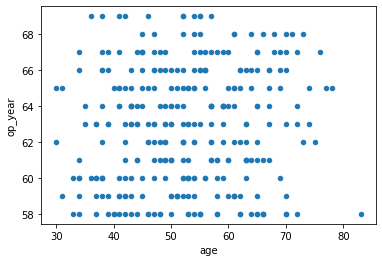

In [9]:
haberman.plot(kind='scatter',x='age',y='op_year');
plt.show()

As we can see that we can't differentiate the values present in the plot so lets try it with colour coding

# Coloured Scatter Plot

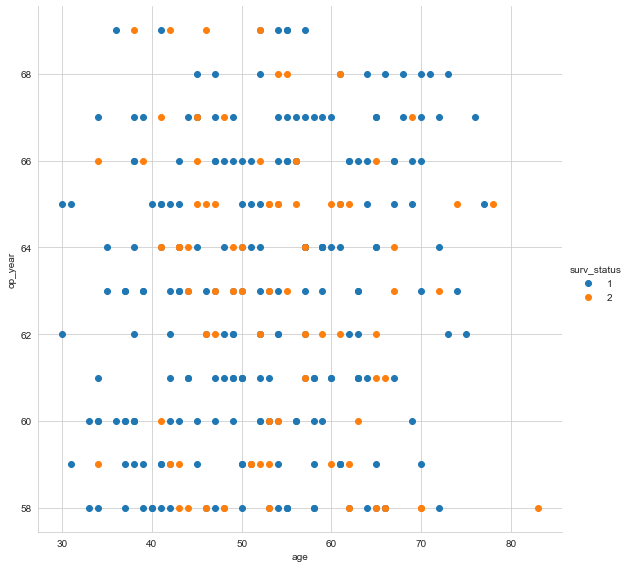

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman,hue='surv_status',height=8)\
   .map(plt.scatter,'age','op_year')\
   .add_legend();
plt.show();

From this plot also we can not clearly differentiate the survival status of the person so let's try for pair plots.

# Pair Plots 

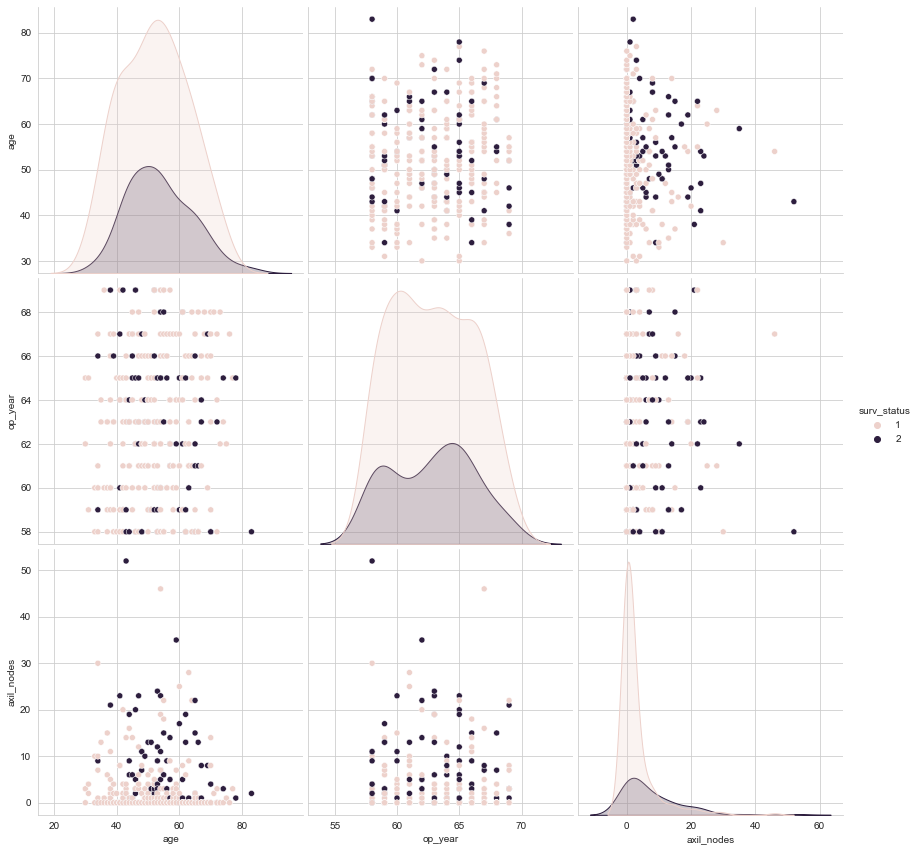

In [13]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman,hue='surv_status',height=4)
plt.show()

Obervations:
   1) The pair plots are also not giving any specific information to differntiate between surv_status 1 & 2.
   
   2) We can see that there is some overlapping going on in the plot of Age and Number of axil nodes. There are no key points by which we can conclude any relation of surv_status with variables other axial nodes. 
   
   3) So, Let's try with Univariate analysis of axial nodes.

# Univariate Analysis

1-D Scatter plot of axil nodes

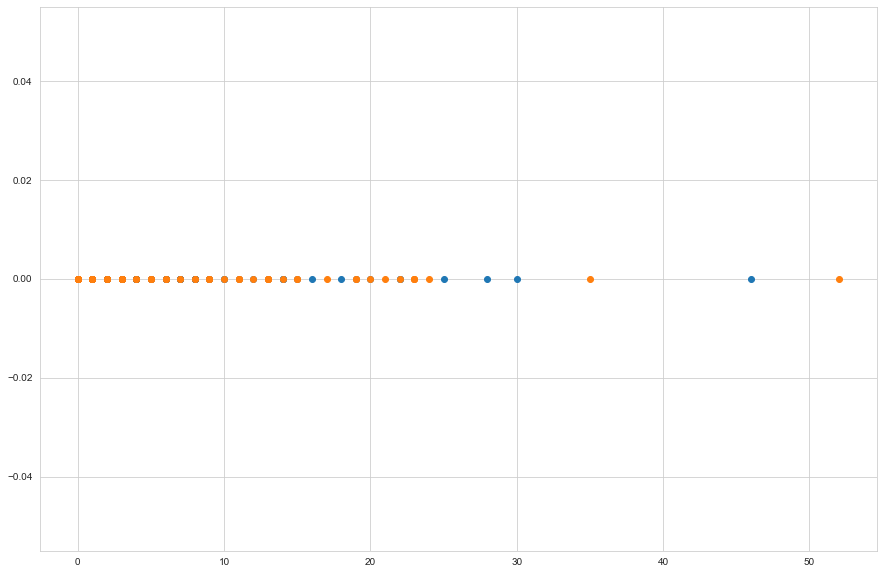

In [34]:
Haberman_surv_status1=haberman.loc[haberman["surv_status"]==1];
Haberman_surv_status2=haberman.loc[haberman["surv_status"]==2];
plt.plot(Haberman_surv_status1["axil_nodes"], np.zeros_like(Haberman_surv_status1['axil_nodes']), 'o')
plt.plot(Haberman_surv_status2["axil_nodes"], np.zeros_like(Haberman_surv_status2['axil_nodes']), 'o')
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?


As we can see there is still some overlapping going on in the above plot.

C:\Users\tomar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tomar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


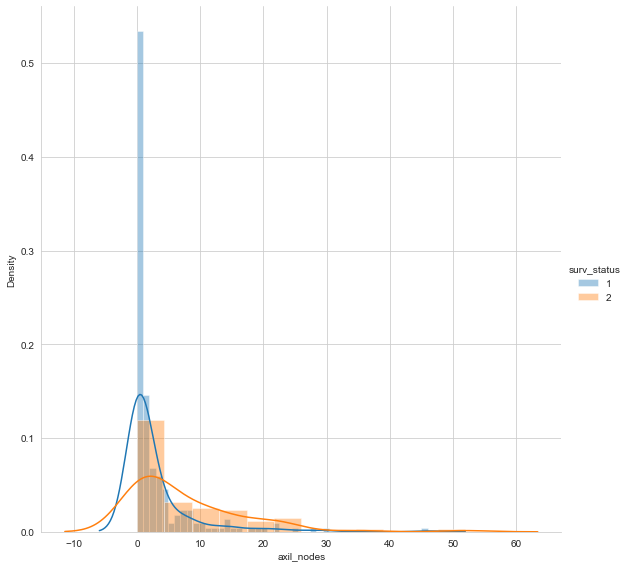

In [24]:
sns.FacetGrid(haberman, hue="surv_status", height=8) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.show();

As we can see in the above plot that surv_status 1 has more values than surv_status 2.Let's try with other features as well 

C:\Users\tomar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tomar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


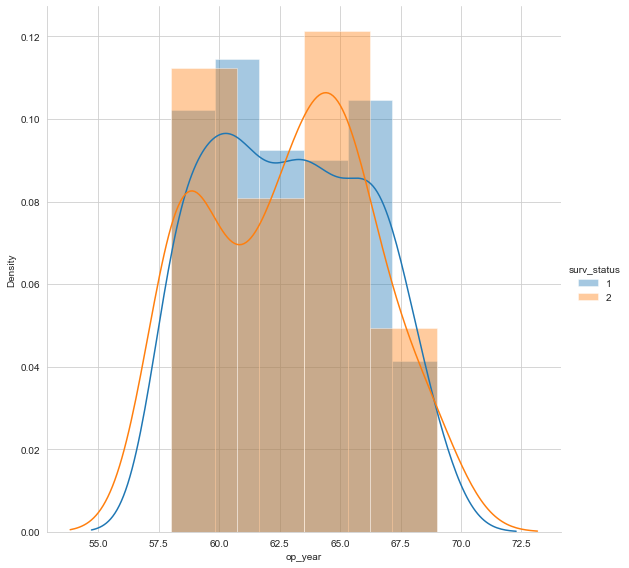

In [25]:
sns.FacetGrid(haberman, hue="surv_status", height=8) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.show();

C:\Users\tomar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tomar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


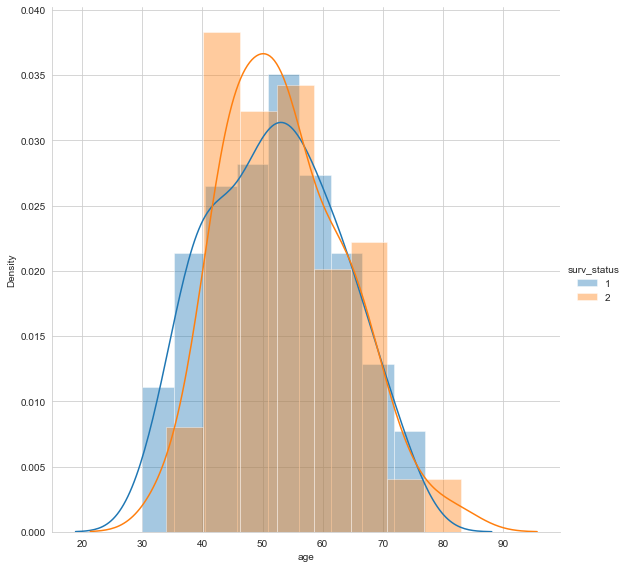

In [26]:
sns.FacetGrid(haberman, hue="surv_status", height=8) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

There is a huge overlapping going on within the plots of both features so we can't conclude anything from it.

# Let's try PDF and CDF of surv_status on the basis of axil_nodes

## PDF and CDF for surv_status 1

[0.73214286 0.10267857 0.02678571 0.05357143 0.01339286 0.00892857
 0.02232143 0.00446429 0.00892857 0.00892857 0.00446429 0.
 0.00446429 0.00446429 0.         0.         0.         0.
 0.         0.00446429]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]


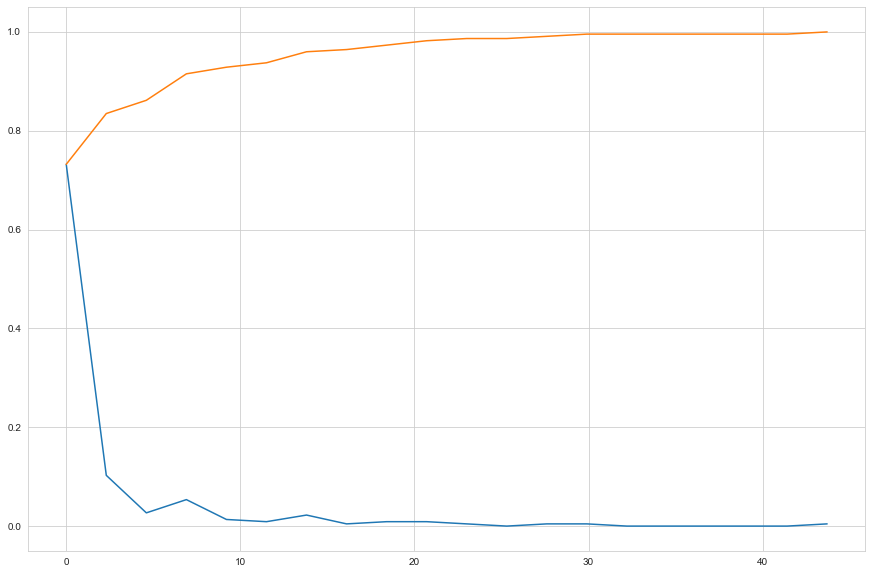

In [36]:
plt.rcParams['figure.figsize'] = (15, 10)
counts, bin_edges = np.histogram(Haberman_surv_status1['axil_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[:-1], pdf);
plt.plot(bin_edges[:-1], cdf)
plt.show()

## PDF and CDF for surv_status 2

[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


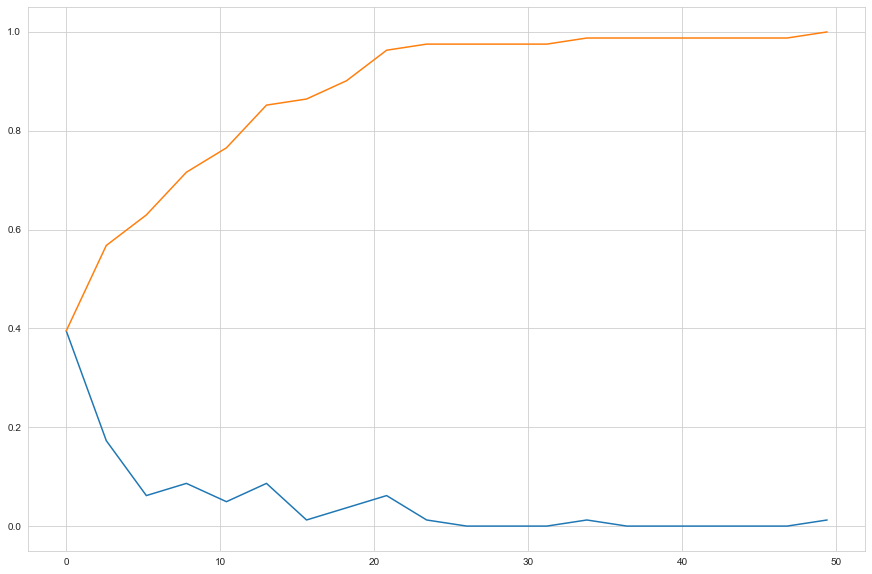

In [37]:
counts, bin_edges = np.histogram(Haberman_surv_status2['axil_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[:-1], pdf);
plt.plot(bin_edges[:-1], cdf)
plt.show()

## PDF and CDF for surv_status 1 and surv_status 2 combined

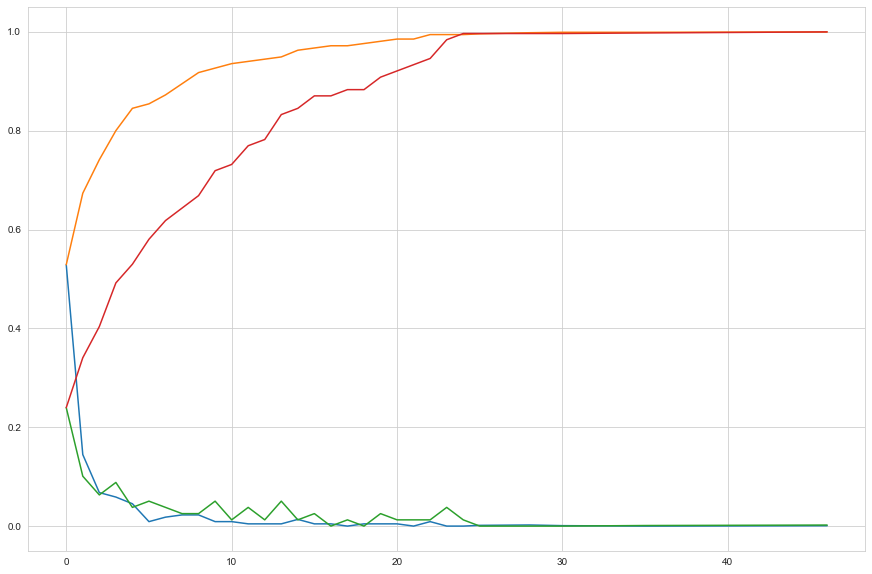

In [42]:
counts, bin_edges = np.histogram(Haberman_surv_status1['axil_nodes'], bins=sorted(list(haberman['axil_nodes'].unique())), 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[:-1], pdf);
plt.plot(bin_edges[:-1], cdf)

counts, bin_edges = np.histogram(Haberman_surv_status2['axil_nodes'], bins=sorted(list(haberman['axil_nodes'].unique())), 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[:-1], pdf);
plt.plot(bin_edges[:-1], cdf)
plt.show()

# Whiskers Plot

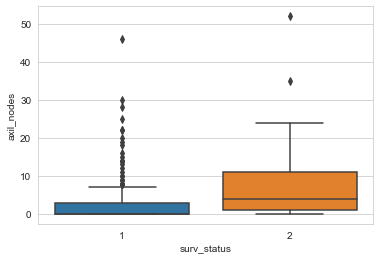

In [28]:
sns.boxplot(x='surv_status',y='axil_nodes', data=haberman)
plt.show()

50-75% value of surv_status 2 have axil_nodes in the range of 4-11.
The upper whisker of surv_status 1 & 2 are at 8 and 24 respectively



# Violin Plots

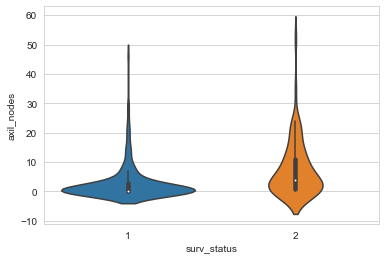

In [30]:
sns.violinplot(x="surv_status", y="axil_nodes", data=haberman, size=8)
plt.show()